In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy.special
import seaborn as sns
import pandas as pd
import requests
import PIL
import scipy.stats

In [2]:
#Python tip attributes of scipy are not accessable as attributes of hte base scipy package - need to input attribute directly

$G(t,k,\theta) = \dfrac{1}{\Gamma(k)\theta^k} t^{k-1} e^ {-\dfrac{t}{\theta}} $


generalization of normal, chi, exponential and erlang:

takes in 2 parameters
1. K = shape parameter
2. Theta = scale parameter (= $\dfrac{1}{\lambda}$)

PDF and CDF displayed below for k = 1 and theta = 1
THIS IS A UNIT EXPONENTIAL!


Text(0.5, 1.0, 'Unit Exponential')

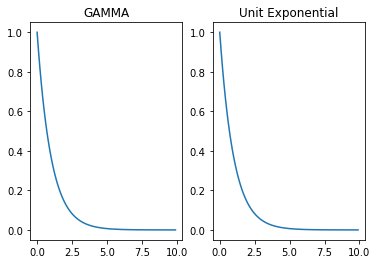

In [3]:
k = 1 #Shape parameter 
theta = 1 #Scale parameters or lambda

alpha = k
beta = 1/theta

T = np.arange(0,10,0.1)

def G(t,k,theta):
    return 1/(scipy.special.gamma(k) * theta**k)*t**(k-1)*np.exp(-t/theta)

fig =plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(T,[G(t,k,theta) for t in T])
ax1.set_title("GAMMA")

ax2 = fig.add_subplot(122)
ax2.plot(T,[np.exp(-t) for t in T])
ax2.set_title("Unit Exponential")


Side note on eurler integral (gamma function) - G(n) = (n-1)! - generalization of hactorial to non integers

# altering parameters

k is the scale value - 
equivalent to summing multiple i.i.d random variables 

i.e. G(t,n,1) = sum of n i.i.d exponential r.v. = ERLANG DISTRIBUTION

For a large K teh gamma converges to the normal distribution ?CLT


<AxesSubplot:xlabel='x'>

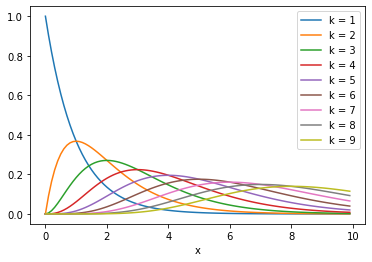

In [4]:
DF_k = pd.DataFrame(T,columns = ["x"])

for i in range(1,10):    
    DF_k[f"k = {i}"] = [G(t,i,theta) for t in T]

# #pivot the dataframe
# DF_k.pivot(index = "x")


#set index instead!
DF_k.set_index("x")

#works like PYPLOT
DF_k.plot(x = "x",label = DF_k.columns[2:10])




## Erlang equivalence

$G(t,n,1) = \dfrac{1}{\Gamma(n)} t^{n-1} e^ {-t} $

To derive erlang equivalence - use poisson process (P of n arrivals in tiem tau)

$P(Yk~<=~Y) = \sum_{n=k}^{\infty} P(n,y)$

intuitive argument
probability of kth arrival occuring time period delta after y

$ = f_{Yk}(t)\delta$

$P(k~arrivals~in~time~t) = P(k-1~arrivals~in~time~t-\delta)*P(1~arrival~in~\delta)$ 

since we assume that there is anegligible probability of >1 arrival durign time delta then this is the only way that the kth arrival happens "at" y

this equals:

$\dfrac{e^{-\lambda t}(\lambda t)^{k-1}}{(k-1)!}*\lambda$

#assume lambda = 1 and can see equavalnce or look at original gamme for theta equlivalence

NB: $\theta = 1/\lambda$



In [5]:
#The formula is identical

## $\chi^2$ equivalence


If $\theta = \dfrac{1}{2}$ - then the gamma function takes on the form of chi squares

i.e G(t,n,2) = chi- square with n degrees of freedom

To find chi square distribution equation, start with normal distribution 

let $X \sim N(0,1)$
then $X^2 \sim \chi^2(0,1)$

let $Y = X^2$

?NEED TO WORK WITH CDF?????

so plug in sqrt(x) into normal distirbution CDF to get CDF chi square with 1 DOF

$P(Y = x) = P(|X| = \sqrt{x}) = P(-\sqrt{x} < X < \sqrt{x}) =  F_X(\sqrt{x}) - F_X(-\sqrt{x}) = 2F_X(\sqrt{x}) - 1$

# COME BACK TO THIS MORE COMPLICATED THAN I REALISED

### ?perhaps the reason you cant wrok directly with the PDF is hte paradox of calculus where hte probability of a given value i.e P(X = $\sqrt{x}) = 0$ - I JUST THOUGHT OF THIS IT MIGHT BE COMPLETE BULLSHIT - THIS IS WRONG!! PLUGGING IN $\sqrt{x}$ gives the right probability of chisquarred with 1 DOF but this formula does not generalize to higher degrees of freedom - hence needing to work with the CDF which does!!!! - NOT 100% sure but this makes more sense - STILL WRONG BUT CLOSER!!!!!!

Need to use change of random variable formula rather tha just manually plugging shit in - ?due tot he fact that sqrt(x) isn't linear???? NOT SURE

##  I THNK IT ACTUALLY LINKS BACK TO THE FIRST THING I WROTE - NEED TO WORK CDF!!!!
# Works directly with discete random variables! - lends credence to this theory - WHEN WORKING WITH CONTINUOUS VARIABLE NEED TO WORK WITH REGIONS!



    



IGNOR THIS \dfrac{1}{\sqrt{2\pi}}e^{-\dfrac{1}{2}x}$

In [6]:
def norm(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)


#Chi sqaured of standard normal - ALL CHI SQUARED IS STANDARD NORMAL!!!!

#WAIT A SECOND!!!!!!

def wrong_chi2_1(x):
    #WRONG
    # 2*norm(sqrt(x))
    # does not generalize for higher DOF
    return 2*1/np.sqrt(2*np.pi)*np.exp(-0.5*x) 

# def revised_chi2_1(x):
#     return norm(np.sqrt(x))*1

chiPDF = scipy.stats.chi2.pdf

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(T,[norm(t) for t in T], c = "red")
ax.plot(T,[wrong_chi2_1(t) for t in T],c= "blue")
ax.plot(T,[chiPDF(t,1) for t in T], c = "green")
ax.grid(True)



SyntaxError: invalid syntax (Temp/ipykernel_32132/2752427588.py, line 16)

# Change of variables

Let X be a continuous random variable with pdf f

let $Y = g(X)$

*WHERE G IS A MONOTONIC FUNCTION - either increase or decreasing (Just has to be invertable - these might be the same thing)

if g is monotonically increasing then....

$$
\begin{align}

F_Y(y) & = P(Y \leq y) \\
& = P(g(X) \leq y) \\
& = P(X \leq g^{-1}(y)) \\
& = F_X(g^{-1}(y))

\end{align}
$$


intermediate results
$$
\begin{align}

let~g(x_1) & = y \\
x_1 & = g^{-1}(y)  \\

\\
\dfrac{dx_1}{dy} & = \dfrac{d}{dy}g^{-1}(y) \\
using~inverse~function~rule... \\
\dfrac{d}{dy}g^{-1}(y) & = \dfrac{1}{g'(g^{-1}(y))} \\
\dfrac{d}{dy}g^{-1}(y) & = \dfrac{1}{g'(x_1)} \\
\end{align}
$$

Then to get the PDF we differentiate the CDF

$$
\begin{align}

P_Y(y) & = \dfrac{d}{dy}F_X(g^{-1}(y)) \\
& = \dfrac{d}{dy}F_X(x_1) \\
& = \dfrac{d}{dx_1}\dfrac{dx_1}{dy}F_X(x_1) \\
& = \dfrac{dx_1}{dy}\dfrac{d}{dx_1}F_X(x_1) \\
& = \dfrac{dx_1}{dy}f_X(x_1) \\
& = \dfrac{f_X(x_1)}{g'(x_1)}

\end{align}
$$

            

# so for chi2

Y = X^2 

Y = g(X)  where g(x) = x^2 and g'(x) = sqrt(x)

chi2(y) = normal(x1)*1\(g'(x1))


where x1 = g^-1(y) = sqrt(y)


= normal(x1)*1\(2x1)
= normal(sqrt(y))*1\(2*sqrt(y))

# needs further extension of g(x) is not monotonic

# despite not being monotonic it is symmetric so simply times the result by 2!!!!

In [ ]:

y = 5

print(2*norm(np.sqrt(y))*(1/(2*np.sqrt(y))))

print(chiPDF(y,1))

#WOWOWOOWOWOO


0.01464498256192648
0.014644982561926487
